<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-GloveVectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeightWatcher Vector Metrics

Only available on WW 0.6.2 and higher


In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
import numpy as np
import pandas as pd


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher

set custom Logging at WARN Level

In [4]:
import sys
if 'google.colab' in sys.modules:
    !pip install weightwatcher

In [5]:

import weightwatcher as ww
import torchvision.models as models

import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.INFO)

ww.__version__#,  torchvision.__version__

'0.6.2'

### Download GloVe Vectors

In [6]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-12-06 18:55:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-06 18:55:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-06 18:55:24--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [23]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [29]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
        
num_embeddings = len(embeddings_dict)
print(f"We loaded {num_embeddings} embedding Glove vectors ")

We loaded 400000 embedding Glove vectors 


### Examine the first NUM_SAMPLE Glove Vectors

In [70]:
vectors_list = []
NUM_SAMPLE = 5000
ivec = 0
for word, vector in embeddings_dict.items():
    vectors_list.append(vector)
    if ivec > NUM_SAMPLE:
        break
    ivec+=1

In [71]:
watcher = ww.WeightWatcher()
metrics = watcher.vector_metrics(vectors_list)

INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
tensforflow version 2.6.5
keras       version 2.6.0


In [72]:
metrics.head(3)

,length,entropy,discete_entropy,localization_ratio,participation_ratio
0,50.0,0.033278,2.599604,4.386115,1.223002
1,50.0,0.042516,2.740198,5.120958,1.251486
2,50.0,0.043183,2.600542,4.211957,1.179149


Text(0.5, 1.0, 'Vector Entropies')

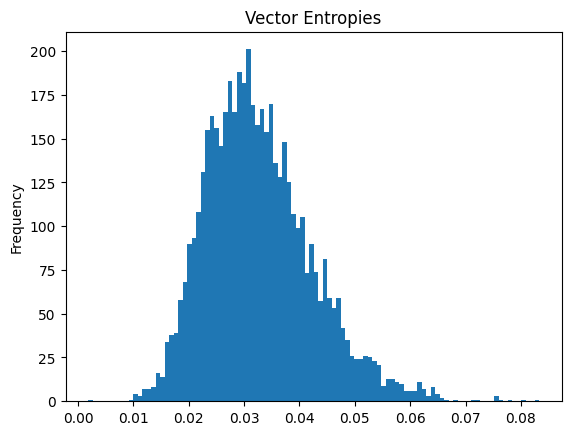

In [73]:
metrics.entropy.plot.hist(bins=100)
plt.title("Vector Entropies")

Text(0.5, 1.0, 'Discrete Entropies')

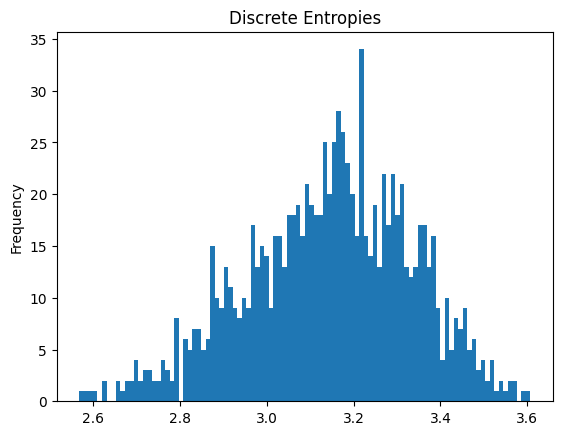

In [74]:
metrics_1k.discete_entropy.plot.hist(bins=100)
plt.title("Discrete Entropies")

Text(0.5, 1.0, 'Localization Ratios')

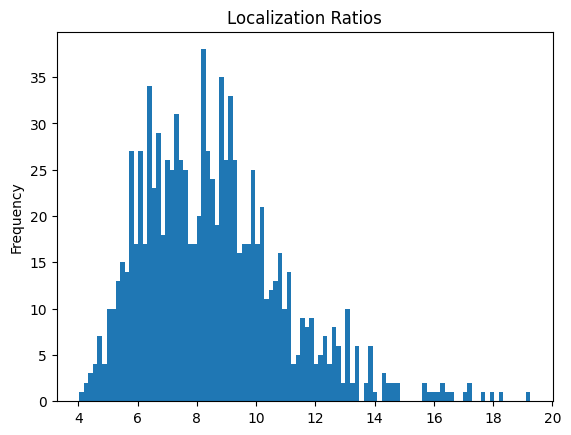

In [75]:
metrics_1k.localization_ratio.plot.hist(bins=100)
plt.title("Localization Ratios")

Text(0.5, 1.0, 'Partcipation Ratios')

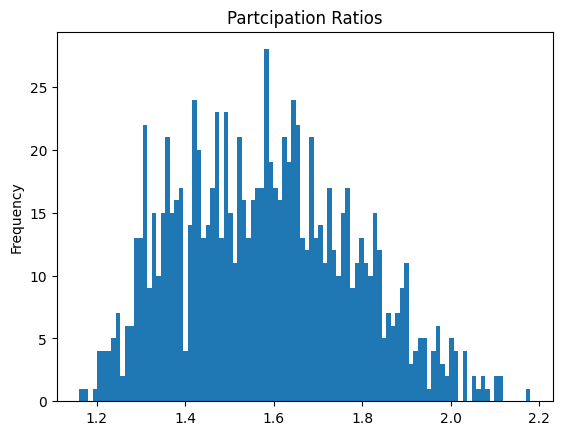

In [76]:
metrics_1k.participation_ratio.plot.hist(bins=100)
plt.title("Partcipation Ratios")
